<IPython.core.display.Javascript object>


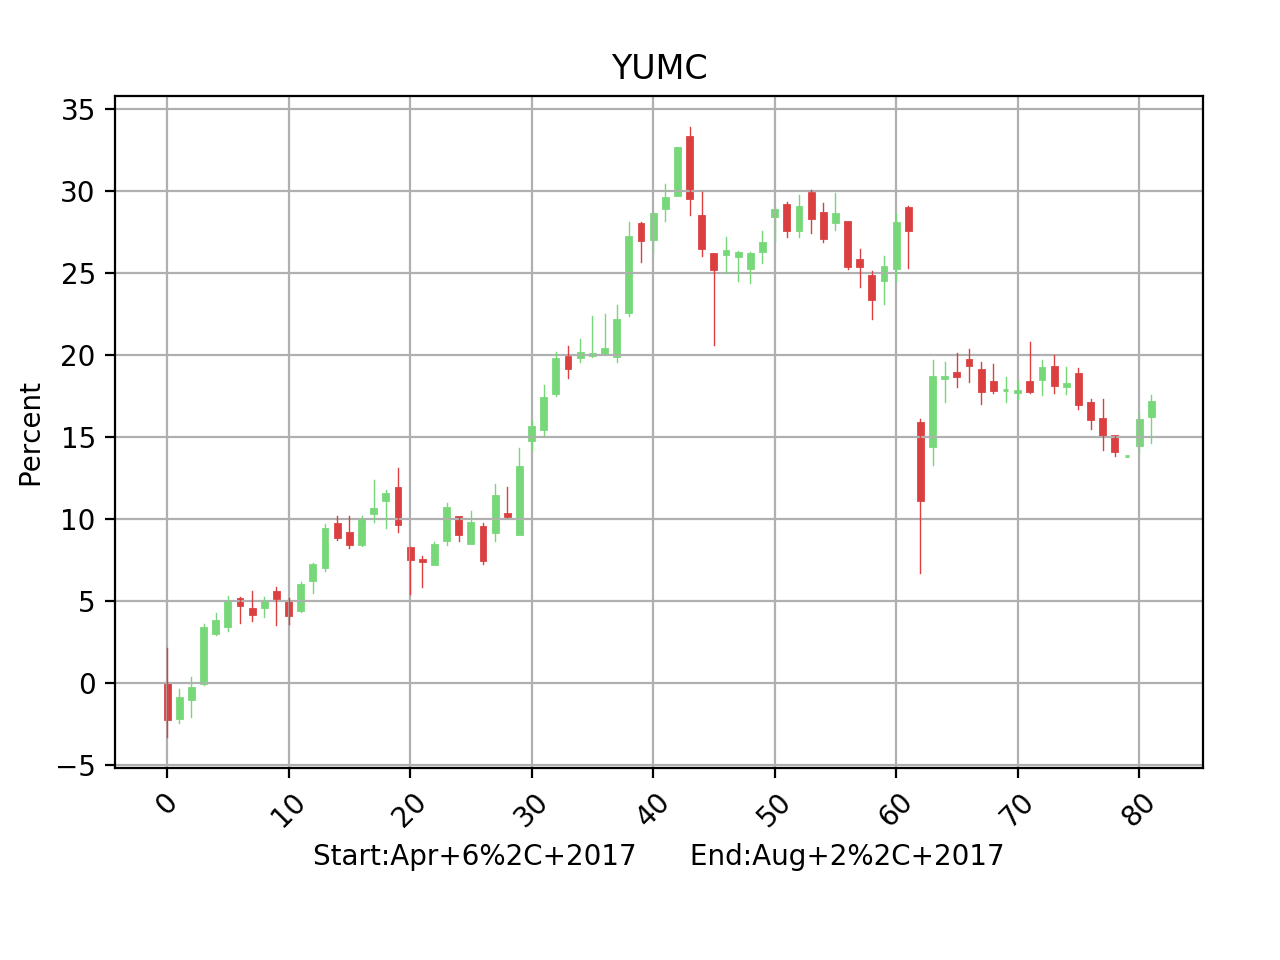

URL is: http://www.google.com/finance/historical?q=YUMC&startdate=Apr+6%2C+2017&enddate=Aug+2%2C+2017&output=csv


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [116]:
%matplotlib notebook
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib.ticker as mticker
from matplotlib.finance import candlestick_ohlc

import numpy as np
import urllib
import datetime as dt
import pandas as pd
import csv


#url = "https://raw.github.com/datasets/gdp/master/data/gdp.csv"

#datareader = csv.reader(io.TextIOWrapper(webpage))

def bytespdate2num(fmt, encoding='utf-8'):
    strconverter = mdates.strpdate2num(fmt)
    def bytesconverter(b):
        s = b.decode(encoding)
        return strconverter(s)
    return bytesconverter


def graph_data(stock,start,end):
    fig = plt.figure()
    ax1 = plt.subplot2grid((1,1), (0,0))

    url= "http://www.google.com/finance/historical?q="+stock+"&startdate="+start+"&enddate="+end+"&output=csv"
    #url= "http://www.google.com/finance/historical?q="+stock+"&startdate=Apr+17%2C+2017&enddate=Jul+30%2C+2017&output=csv"
    source_code = urllib.request.urlopen(url).read().decode()
    
    print('URL is: '+url)

    stock_data = []
    split_source = source_code.split('\n')
    for line in split_source:
        split_line = line.split()
        if 'Volume' not in line:
            stock_data.append(line)
    

    ohlc = []
    reader = csv.reader(stock_data)
    your_list = list(reader) 
    x = 0
    
    for line in reversed(stock_data):
        if line != '':
            date, openp, highp, lowp, closep, volume = line.split(',')
            
            if x == 0:
                start_value = float(openp)
            
            if openp == '-':
                openp = closep
            if highp == '-':
                highp = closep
            if lowp == '-':
                lowp = closep
                
            openp = (float(openp) - start_value) / start_value * 100
            highp = (float(highp) - start_value) / start_value * 100
            lowp = (float(lowp) - start_value) / start_value * 100
            closep = (float(closep) - start_value) / start_value * 100
                
            date = bytespdate2num('%d-%b-%y')
            
            append_me = x, float(openp), float(highp), float(lowp), float(closep), float(volume)
            #print(append_me)
            ohlc.append(append_me)
            
            x+=1


    candlestick_ohlc(ax1, ohlc, width=0.4, colorup='#77d879', colordown='#db3f3f')

    for label in ax1.xaxis.get_ticklabels():
        label.set_rotation(45)

    #ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d')) # only use if you want to see dates
    #ax1.xaxis.set_major_locator(mticker.MaxNLocator(10)) # only use if you want to see dates
    ax1.grid(True)
    

    plt.xlabel('Start:'+start+'      End:'+end)
    plt.ylabel('Percent')
    plt.title(stock)
    plt.legend()
    plt.subplots_adjust(left=0.09, bottom=0.20, right=0.94, top=0.90, wspace=0.2, hspace=0)
    plt.show()
    
    
    
#graph_data('SYX','Jan+7%2C+2016','Dec+23%2C+2016')  
graph_data('YUMC','Apr+6%2C+2017','Aug+2%2C+2017')
#graph_data('SYX')   

<IPython.core.display.Javascript object>


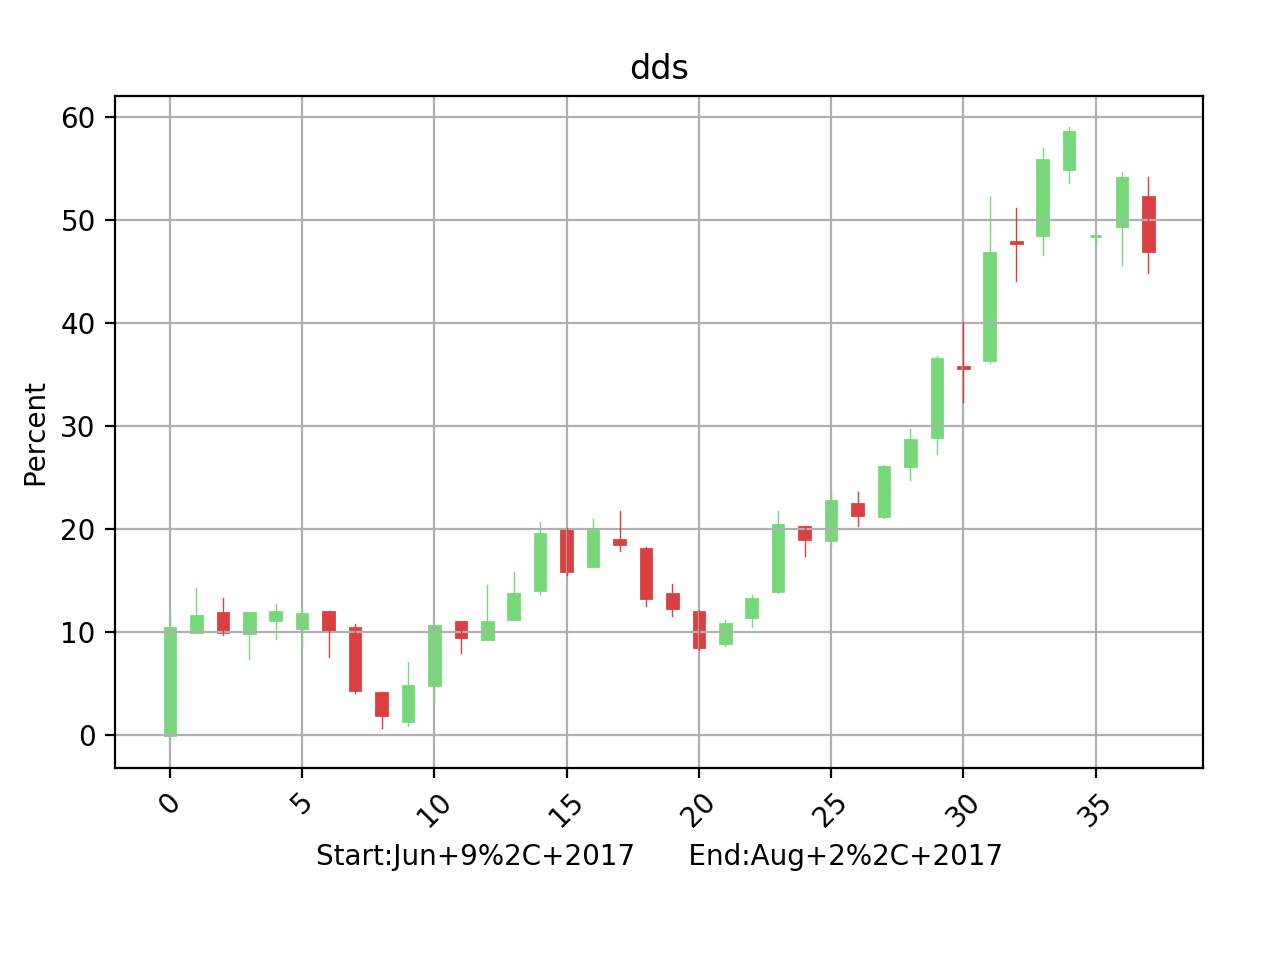

URL is: http://www.google.com/finance/historical?q=dds&startdate=Jun+9%2C+2017&enddate=Aug+2%2C+2017&output=csv


/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/matplotlib/axes/_axes.py:545: UserWarning: No labelled objects found. Use label='...' kwarg on individual plots.
  warnings.warn("No labelled objects found. "


In [113]:
graph_data('dds','Jun+9%2C+2017','Aug+2%2C+2017')